In [ ]:
# install 
# !apt update && apt install -y ffmpeg libsm6 libxext6

In [ ]:
#Importing necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

plt.rcParams['figure.figsize'] = (10, 7)

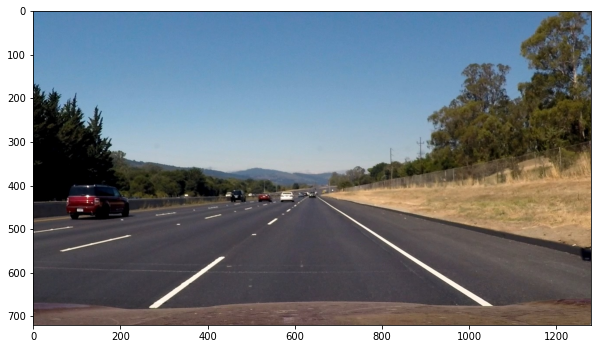

In [ ]:
#Loading test image
image = cv2.imread("./test_images/straight_lines2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image);

In [ ]:
#Defining function to reduce noise and detect edges
def canny_edge_detector(image): 
      
    # Convert the image color to grayscale 
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  
      
    # Reduce noise from the image 
    blur = cv2.GaussianBlur(gray_image, (5, 5), 0)  
    canny = cv2.Canny(blur, 150, 250) 
    return canny 

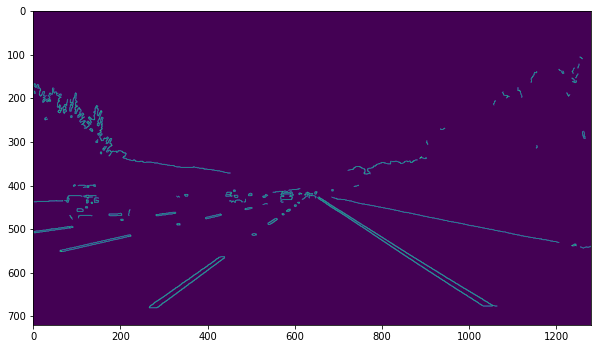

In [ ]:
#Showing image with detected edges
canny_image = canny_edge_detector(image)
plt.imshow(image_canny);

In [ ]:
# Specifying region of interest with a polygon on the image 
def region_of_interest(image): 
    height = image.shape[0] 
    width = image.shape[1]
    polygons = np.array([ 
        [(0, height),
        (int(width/2), int(height/2)),
        (width, height)]
        ]) 
    
    mask = np.zeros_like(image) 
      
    # Fill poly-function deals with multiple polygon 
    cv2.fillPoly(mask, polygons, 255)  
      
    # Bitwise operation between canny image and mask image 
    masked_image = cv2.bitwise_and(image, mask)  
    return masked_image

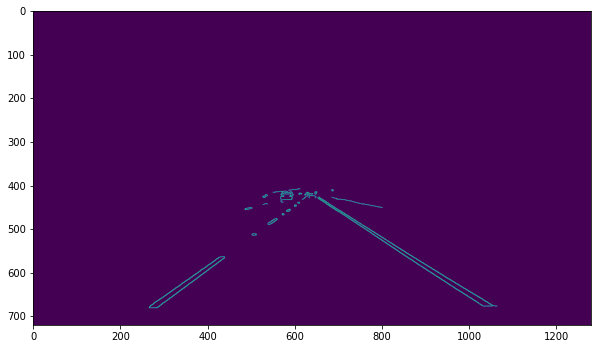

In [ ]:
cropped_image = region_of_interest(canny_image)
plt.imshow(masked_image);

In [ ]:
lines = cv2.HoughLinesP(cropped_image, 2, np.pi / 180, 100,  
                            np.array([]), minLineLength = 40,  
                            maxLineGap = 5) 

In [ ]:
def average_slope_intercept(image, lines): 
    left_fit = [] 
    right_fit = [] 
    for line in lines: 
        x1, y1, x2, y2 = line.reshape(4) 
          
        # It will fit the polynomial and the intercept and slope 
        parameters = np.polyfit((x1, x2), (y1, y2), 1)  
        slope = parameters[0] 
        intercept = parameters[1] 
        if slope < 0: 
            left_fit.append((slope, intercept)) 
        else: 
            right_fit.append((slope, intercept)) 
              
    left_fit_average = np.average(left_fit, axis = 0) 
    right_fit_average = np.average(right_fit, axis = 0) 
    left_line = create_coordinates(image, left_fit_average) 
    right_line = create_coordinates(image, right_fit_average) 
    return np.array([left_line, right_line]) 

In [ ]:
def create_coordinates(image, line_parameters): 
    slope, intercept = line_parameters 
    y1 = image.shape[0] 
    y2 = int(y1 * (3 / 5)) 
    x1 = int((y1 - intercept) / slope) 
    x2 = int((y2 - intercept) / slope) 
    return np.array([x1, y1, x2, y2])

In [ ]:
def display_lines(image, lines): 
    line_image = np.zeros_like(image) 
    if lines is not None: 
        for x1, y1, x2, y2 in lines: 
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10) 
    return line_image 

In [ ]:
averaged_lines = average_slope_intercept(image, lines)

line_image = display_lines(image, averaged_lines)

combo_image = cv2.addWeighted(image, 0.8, line_image, 1, 1)  

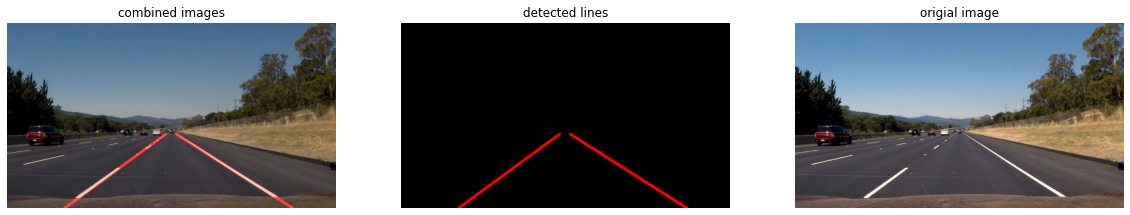

In [ ]:
fig = plt.figure(figsize=(20, 13)) 
rows = 1
columns = 3
  
# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 1) 
plt.imshow(combo_image) 
plt.axis('off') 
plt.title("combined images") 

# Adds a subplot at the 1st position 
fig.add_subplot(rows, columns, 2) 
plt.imshow(line_image) 
plt.axis('off') 
plt.title("detected lines") 
  
# Adds a subplot at the 2nd position 
fig.add_subplot(rows, columns, 3) 
plt.imshow(image) 
plt.axis('off') 
plt.title("origial image"); 

In [ ]:
cap = cv2.VideoCapture("./videos/challenge_video.mp4")  
while(cap.isOpened()): 
    _, frame = cap.read() 
    cv2.imshow("original", frame)
    canny_image = canny_edge_detector(frame) 
    cropped_image = region_of_interest(canny_image) 
      
    lines = cv2.HoughLinesP(cropped_image, 2, np.pi / 180, 100,  
                            np.array([]), minLineLength = 40,  
                            maxLineGap = 5)  
      
    averaged_lines = average_slope_intercept(frame, lines)  
    line_image = display_lines(frame, averaged_lines) 
    combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)  
    cv2.imshow("results", combo_image) 
      
    # When the below two will be true and will press the 'q' on 
    # our keyboard, we will break out from the loop 
      
    # # wait 0 will wait for infinitely between each frames.  
    # 1ms will wait for the specified time only between each frames 
    if cv2.waitKey(30) & 0xFF == ord('q'):       
        break
  
# close the video file 
cap.release()  
  
# destroy all the windows that is currently on 
cv2.destroyAllWindows()  
cv2.waitKey(1)

NameError: name 'original' is not defined

KernelInterrupted: Execution interrupted by the Jupyter kernel.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=86e63d07-a61a-4167-874f-18d75be0a900' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>